# MNIST 손글씨 - CNN v3
- 2 Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 Fully Connected Network layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [2]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

* 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# X data : 0~1 사이의 값, 3차원 --> 4차원   # Conv2D의 경우 3차원의 데이터를 받는다(즉, X데이터는 4차원이어야함)(60000, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255

In [5]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

* 모델 정의, 설정, 학습, 평가

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model = Sequential([
                    Conv2D(32, kernel_size=(3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                    Conv2D(64, (3, 3), activation = 'relu'), # default로 filter 다음에 kernel_size가 오므로 저렇게 써도 된다
                    MaxPooling2D(),         # MaxPooling2D(pool_size=(2, 2))
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')
])
model.summary()

# pedding이 없으므로 28*28이 26*26으로 줄고, 24*24로 줄은 것을 확인할 수 있다

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [8]:
# 파라미터의 경우 첫 Conv2D의 경우 26*26이 32개가 만들어 진다
# (3*3)*32 + 32(bias)
# 그 다음의 경우 26*26이 32개가 만들어진 것이 다시 64개가 만들어 진다(24*24로 축소)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model_path = 'best-mnist-cnn-v3.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [11]:
hist = model.fit(
    X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 200,
    callbacks = [checkpoint, early_stop], verbose = 0
)


Epoch 00001: val_loss improved from inf to 0.05683, saving model to best-mnist-cnn-v3.h5

Epoch 00002: val_loss improved from 0.05683 to 0.05110, saving model to best-mnist-cnn-v3.h5

Epoch 00003: val_loss improved from 0.05110 to 0.03842, saving model to best-mnist-cnn-v3.h5

Epoch 00004: val_loss improved from 0.03842 to 0.03796, saving model to best-mnist-cnn-v3.h5

Epoch 00005: val_loss improved from 0.03796 to 0.03738, saving model to best-mnist-cnn-v3.h5

Epoch 00006: val_loss improved from 0.03738 to 0.03309, saving model to best-mnist-cnn-v3.h5

Epoch 00007: val_loss improved from 0.03309 to 0.03286, saving model to best-mnist-cnn-v3.h5

Epoch 00008: val_loss did not improve from 0.03286

Epoch 00009: val_loss did not improve from 0.03286

Epoch 00010: val_loss did not improve from 0.03286

Epoch 00011: val_loss did not improve from 0.03286

Epoch 00012: val_loss did not improve from 0.03286

Epoch 00013: val_loss did not improve from 0.03286

Epoch 00014: val_loss did not imp

In [12]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9919


[0.02501358836889267, 0.9919000267982483]

* 훈련과정 시각화

In [13]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

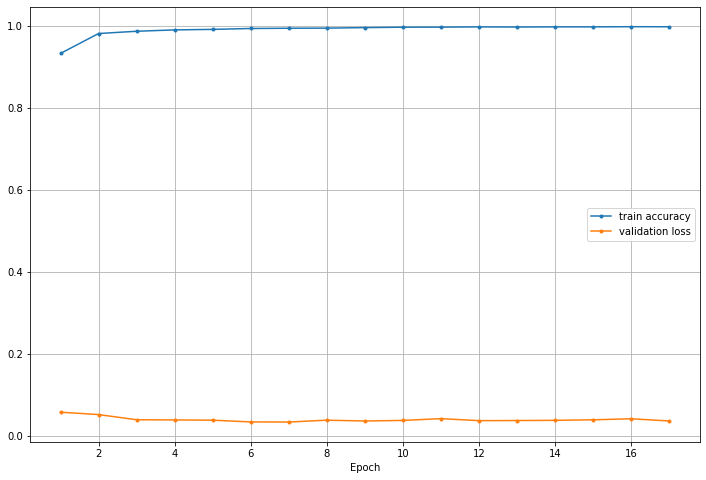

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, 'o-', ms=3, label = 'train accuracy')
plt.plot(xs, y_vloss, 'o-', ms=3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()